# Case Study on Unsupervised Learning

[Dataset](https://drive.google.com/file/d/1of8j1RupWB7eOucpXrzBg7BrlS3UuKuA/view?usp=sharing)

1. Importing necessary libraries and reading the dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('/content/Wholesale customers data.csv')

In [3]:
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [5]:
data.shape

(440, 8)

2. Checking for the presence of null entries

In [6]:
data.isna().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

3. Analyzing 'Channel' and 'Region' attributes

In [7]:
data['Channel'].unique()

array([2, 1])

In [8]:
data['Region'].unique()

array([3, 1, 2])

4. Checking for the presence of outliers

<Axes: ylabel='Fresh'>

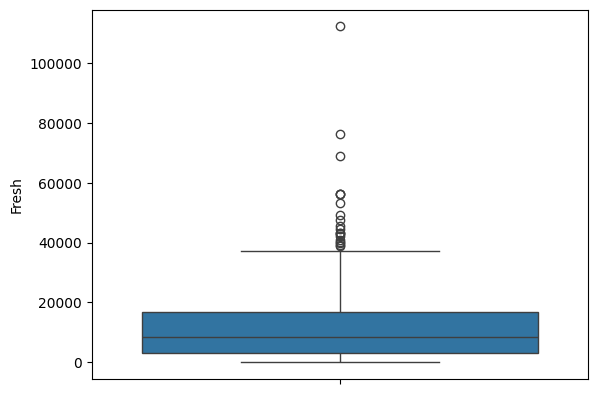

In [10]:
sns.boxplot(data['Fresh'])

<Axes: ylabel='Milk'>

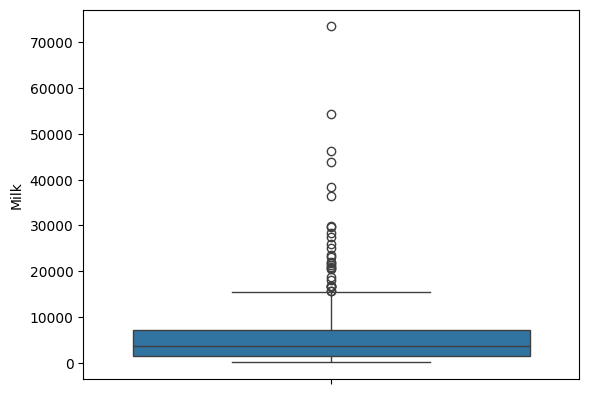

In [9]:
sns.boxplot(data['Milk'])

<Axes: ylabel='Grocery'>

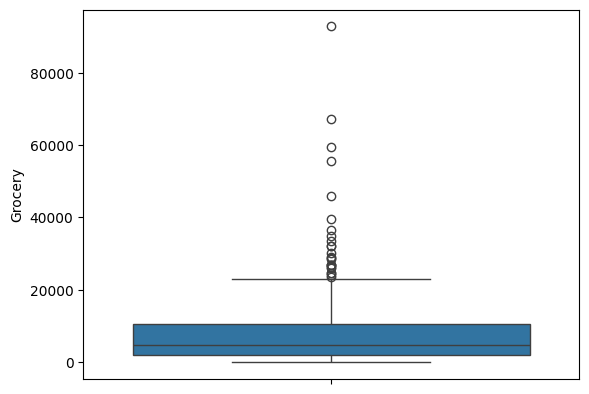

In [11]:
sns.boxplot(data['Grocery'])

<Axes: ylabel='Frozen'>

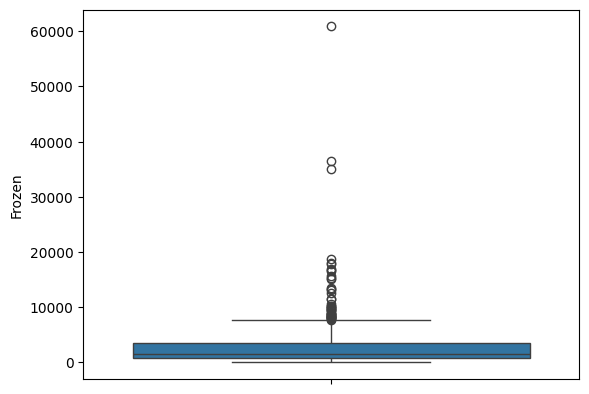

In [12]:
sns.boxplot(data['Frozen'])

<Axes: ylabel='Detergents_Paper'>

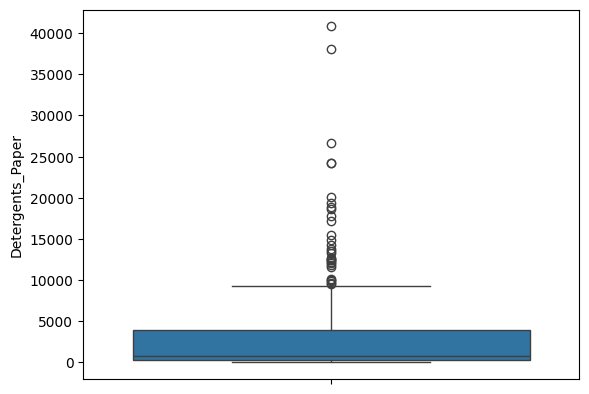

In [13]:
sns.boxplot(data['Detergents_Paper'])

<Axes: ylabel='Delicassen'>

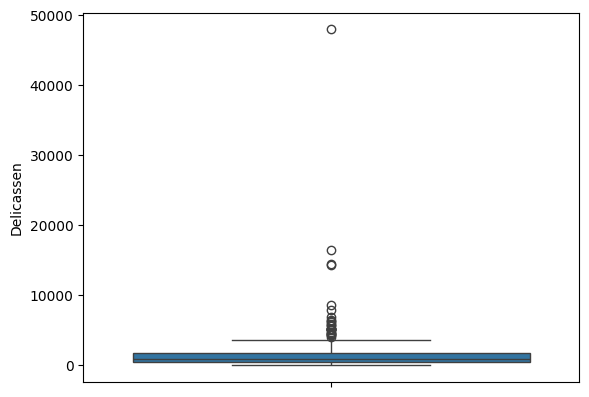

In [14]:
sns.boxplot(data['Delicassen'])

5. Removing outliers

In [15]:
def apply_limit_imputer(df, column_name):
    q1 = df[column_name].quantile(0.25)
    q3 = df[column_name].quantile(0.75)
    iqr = q3 - q1

    upper_limit = q3 + (1.5 * iqr)
    lower_limit = q1 - (1.5 * iqr)

    def limit_imputer(value):
        if value > upper_limit:
            return upper_limit
        elif value < lower_limit:
            return lower_limit
        else:
            return value


    df[column_name] = df[column_name].apply(limit_imputer)

In [16]:
cols = ['Fresh', 'Milk', 'Grocery', 'Frozen','Detergents_Paper', 'Delicassen']

In [17]:
for i in cols:
  apply_limit_imputer(data, i)

6. Analyzing correlation

<Axes: >

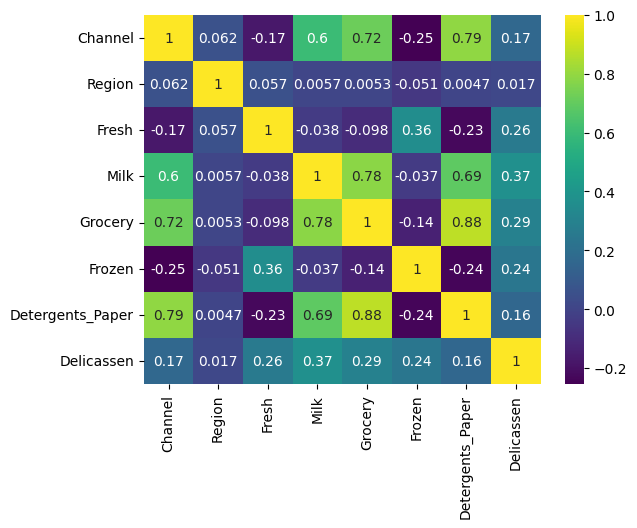

In [18]:
sns.heatmap(data.corr(),annot=True,cmap='viridis')

- The heatmap shows that there are strong positive correlations between:
    - Fresh and Milk
    - Grocery and Detergents_Paper
    - Frozen and Delicassen
- There is a moderate positive correlation between Fresh and Grocery.

7. Scaling the dataset

In [19]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

In [20]:
data = sc.fit_transform(data)

In [21]:
data = pd.DataFrame(data)

In [22]:
data.head()

,0,1,2,3,4,5,6,7
0,1.448652,0.590668,0.128573,1.051586,0.049267,-0.953244,0.095792,0.065892
1,1.448652,0.590668,-0.421627,1.086735,0.353865,-0.309735,0.306519,0.470759
2,1.448652,0.590668,-0.490647,0.858040,0.067935,-0.042437,0.382435,2.469440
3,-0.690297,0.590668,0.187004,-0.879308,-0.457635,1.619962,-0.641923,0.481851
4,1.448652,0.590668,1.103677,0.082487,-0.005824,0.585275,-0.209575,2.469440


# K-Means

8. Clustering the data using K-Means clustering

In [23]:
x = data

In [24]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1,11):
  km = KMeans(n_clusters = i,n_init=10,init = 'k-means++')
  km.fit(x)
  css = km.inertia_ #wcss score
  wcss.append(css)

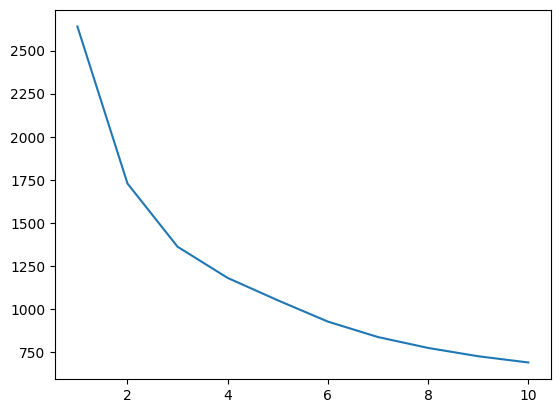

In [37]:
plt.plot(range(1,11),wcss)
plt.xlabel='No.of Clusters'
plt.ylabel='WCSS Score'
plt.show()

 The elbow method suggests choosing the number of clusters where the WCSS score starts to decrease significantly less for each additional cluster. In this case, the plot shows a clear elbow at n_clusters = 3, indicating that adding more clusters beyond this point does not provide a significant improvement in the clustering quality.

In [60]:
km = KMeans(n_clusters = 3,n_init=5,init = 'k-means++')

In [61]:
km.fit(x)

KMeans(n_clusters=3, n_init=5)

In [62]:
cluster_labels = km.predict(x)

In [63]:
pd.Series(cluster_labels).value_counts()

0    214
1    134
2     92
dtype: int64

In [64]:
from sklearn.metrics import silhouette_score

sil_score=silhouette_score(x,cluster_labels)

sil_score

0.2874219524927187

The silhouette score of 0.28 indicates that the clusters are reasonably well-separated

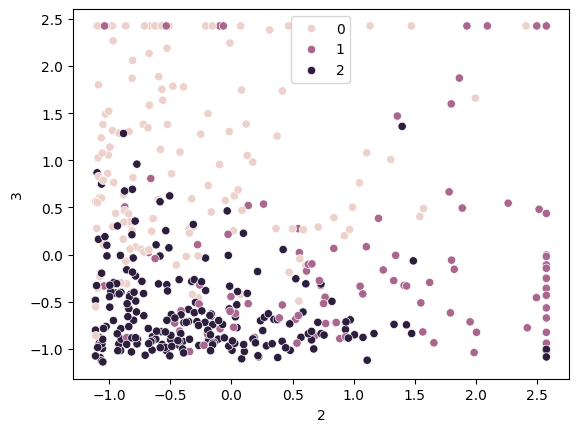

In [31]:
sns.scatterplot(x=data[2], y=data[3], hue=cluster_labels)
plt.show()


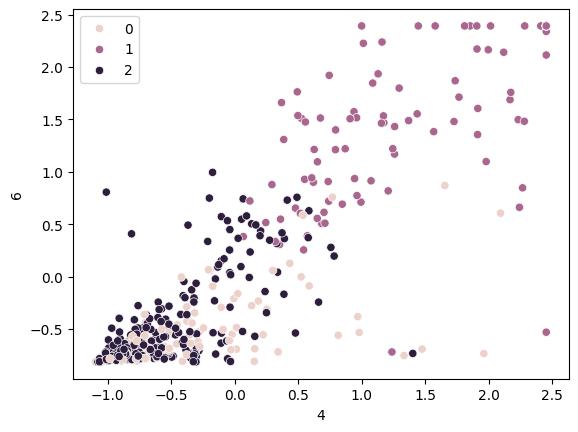

In [52]:
sns.scatterplot(x=data[4], y=data[6], hue=cluster_labels)
plt.show()

# Hierarchical Clustering

9. Clustering using Hierarchical clustering

In [53]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import fcluster

In [54]:
mergings = linkage(x,method='ward')

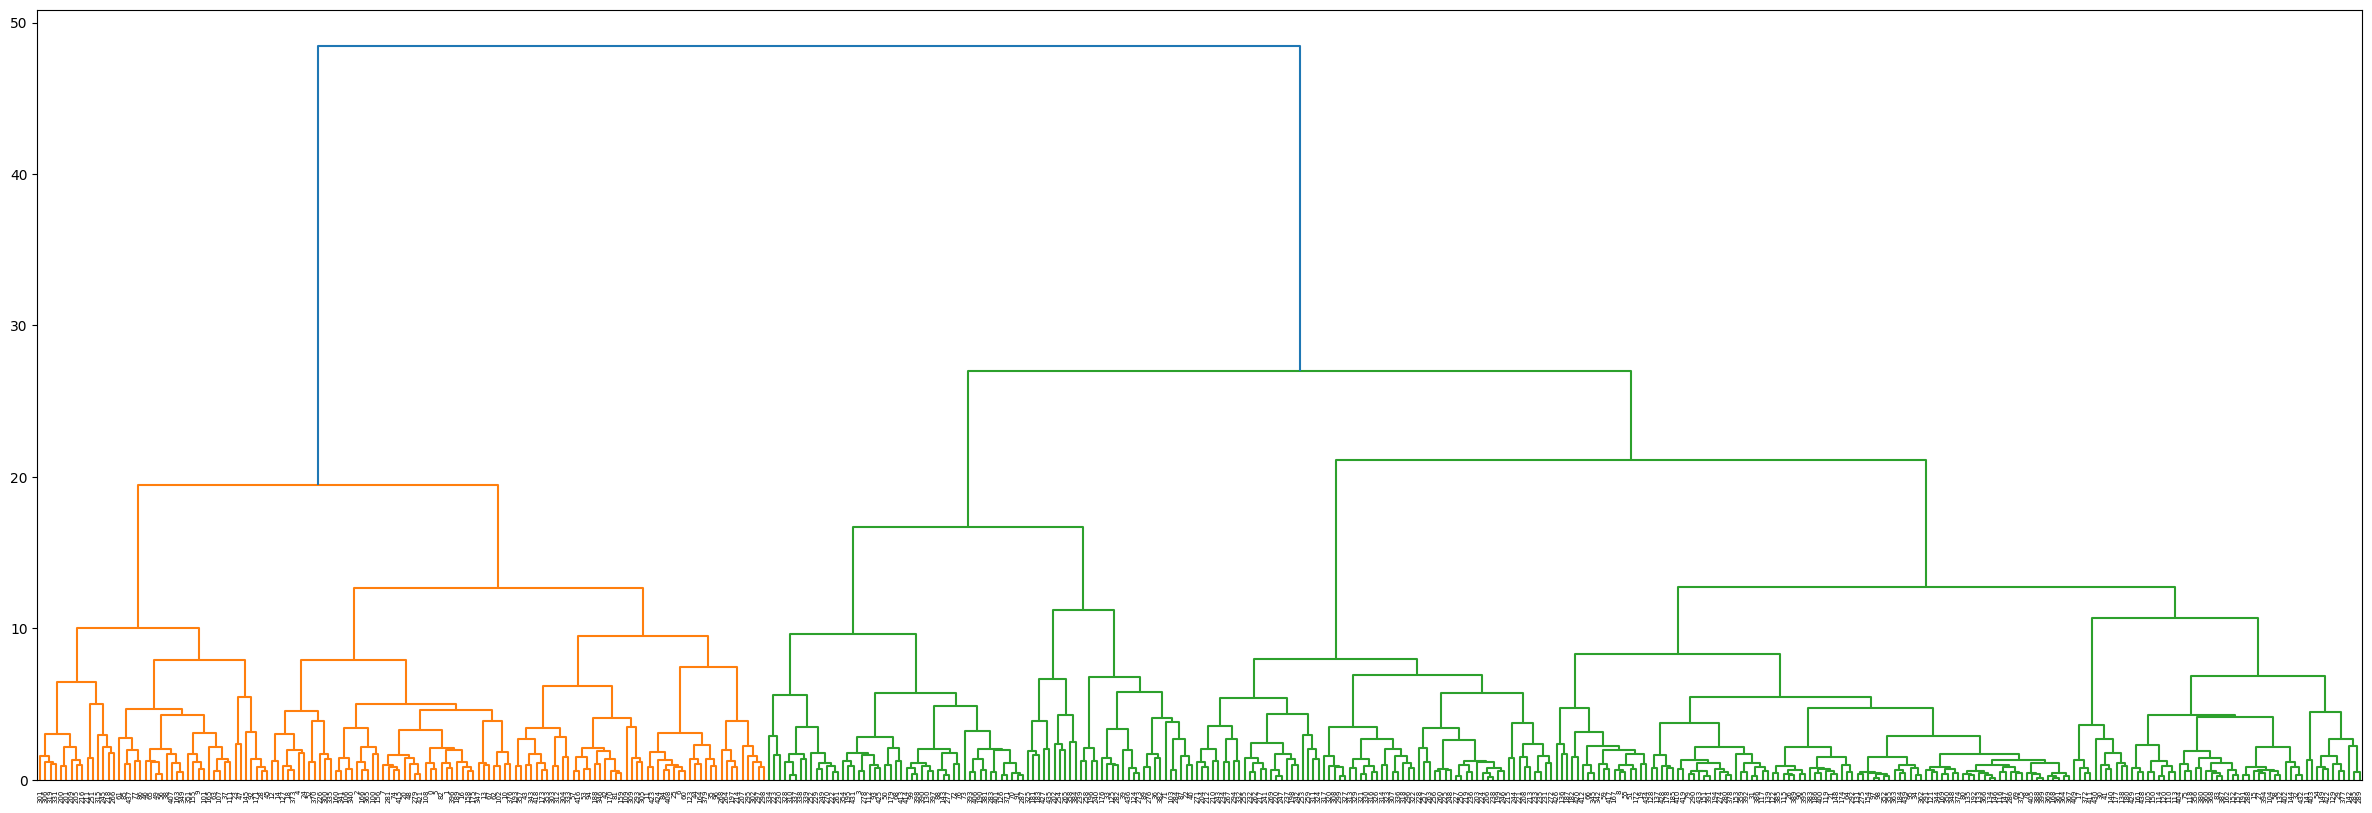

In [65]:
plt.figure(figsize=(30,10))
dendrogram(mergings)
plt.show()

From the dendrogram above, we can conclude that:

* There are three main clusters in the data

In [66]:
# Assign clusters using fcluster
num_clusters = 3  # Derived 3 from the dendrogram above
cluster_labels_hc = fcluster(mergings, num_clusters, criterion='maxclust')

In [67]:
cluster_labels_hc

array([1, 1, 1, 2, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 3, 1, 3, 1, 3, 1, 3,
       2, 1, 1, 1, 3, 3, 1, 3, 3, 3, 3, 2, 3, 1, 2, 1, 1, 2, 2, 3, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 3, 1, 1, 3, 3, 1, 1, 3, 3, 1, 1, 1, 1, 3, 1,
       3, 1, 2, 3, 2, 2, 2, 2, 1, 3, 2, 1, 3, 3, 3, 1, 1, 3, 1, 1, 1, 2,
       2, 2, 3, 2, 1, 2, 1, 3, 1, 3, 3, 2, 1, 1, 1, 2, 3, 3, 1, 1, 1, 1,
       3, 1, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 2, 2, 2, 1, 3, 3, 2, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 1, 1, 3, 1, 1, 1, 3, 3, 1, 1, 1, 1, 3, 3, 3, 1, 1, 3, 1, 3, 1,
       2, 3, 3, 2, 3, 2, 3, 2, 3, 3, 3, 3, 1, 1, 2, 3, 3, 1, 3, 2, 2, 1,
       3, 3, 1, 1, 2, 3, 3, 1, 3, 1, 3, 1, 3, 1, 3, 3, 1, 3, 1, 3, 1, 3,
       3, 3, 2, 2, 3, 3, 1, 3, 3, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 3,
       3, 3, 3, 1, 3, 3, 3, 2, 3, 1, 2, 3, 2, 3, 3, 3, 2, 3, 3, 2, 3, 3,
       1, 2, 1, 3, 1, 3, 2, 3, 3, 2, 3, 3, 2, 2, 2, 1, 3, 1, 2, 2, 2, 3,
       3, 2, 3, 3, 3, 3, 3, 1, 3, 1, 3, 1, 1, 3, 1,

In [68]:
from sklearn.metrics import silhouette_score

sil_score_hc=silhouette_score(x,cluster_labels_hc)

sil_score_hc

0.2855164766420286

The silhouette score of 0.285 indicates that the clusters are reasonably well-separated

# Agglomerative Hierarchical Clustering

10. Hierarchical clustering

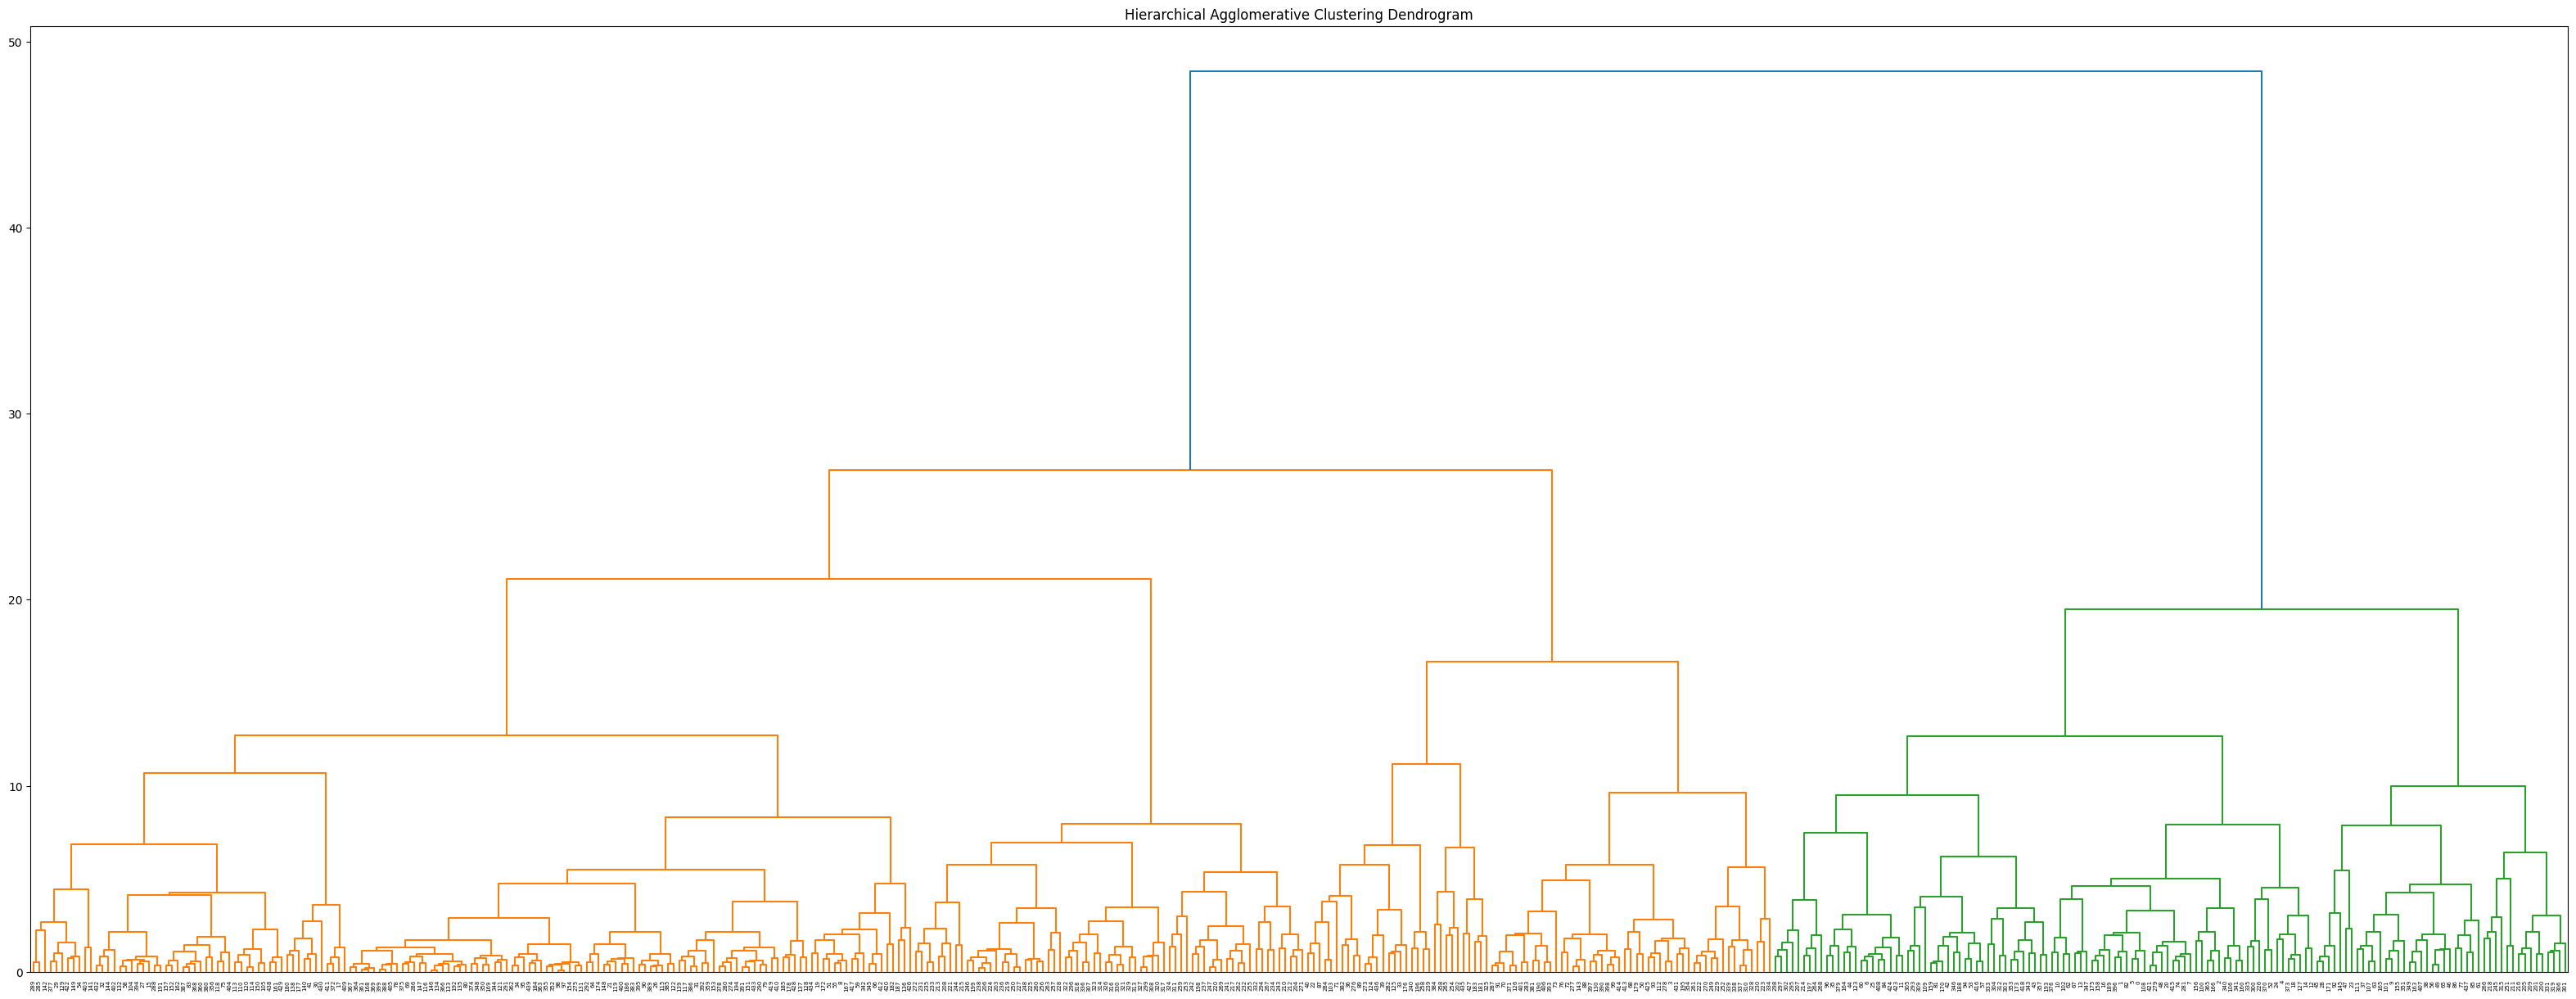

In [69]:
# Visualize the dendrogram
plt.figure(figsize=(40,15))
linked = linkage(x, 'ward')
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Agglomerative Clustering Dendrogram')
plt.show()

From the dendrogram above, we can conclude that:

* There are three main clusters in the data

In [70]:
from sklearn.cluster import AgglomerativeClustering

agg_clustering = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
labels = agg_clustering.fit_predict(x)

In [71]:
silhouette_score(x, labels)

0.2855164766420286

From the silhouette score it can be concluded that the clusters are reasonably separated.

# DBSCAN

11. Cluatering using DBSCAN : An instance of the DBSCAN class is created with specific parameters.
'eps' is the maximum distance between points to consider them in the same neighborhood, and min_samples is the minimum number of data points required to form a dense region.

In [84]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=2.0, min_samples=10)

labels = dbscan.fit_predict(x)

In [85]:
silhouette_score(x, labels)

0.32953329300928813

A higher silhouette score indicates that the clusters are more well-separated.

# Principal Component Analysis

12. Applying PCA to the dataset to reduce the dimensionality to 2.

In [95]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
data_transformed = pca.fit_transform(x)

data_transformed = pd.DataFrame(data_transformed)

pca.explained_variance_


array([3.40973898, 1.63374099])

The explained_variance_ attribute of a PCA object shows the amount of variance explained by each principal component. In this case, the first principal component explains 3.41 units of variance, while the second principal component explains 1.63 units of variance. Together, these two components explain 5.04 units of variance.

13. Applying DBSCAN to the transformed dataset

In [96]:
dbscan = DBSCAN(eps=0.5, min_samples=10)

labels_pca = dbscan.fit_predict(data_transformed)

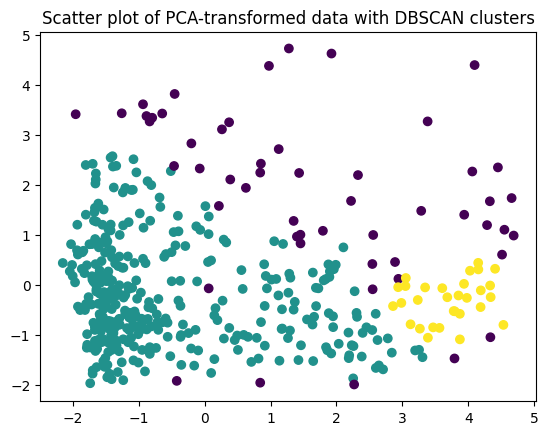

In [97]:
plt.scatter(data_transformed[0], data_transformed[1], c=labels_pca, cmap='viridis')
plt.xlabel = 'PC1'
plt.ylabel = 'PC2'
plt.title('Scatter plot of PCA-transformed data with DBSCAN clusters')
plt.show()


The clusters are well-separated in the PCA-transformed space, indicating that the PCA transformation has effectively captured the underlying structure of the data.

In [98]:
silhouette_score(data_transformed,labels_pca)

0.35302732208736815

DBSCAN with PCA emerged as the most suitable method for clustering this dataset.